In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# This is just a copy of the other file, I wanted to leave the outputs there but run it on a much larger graph

In [2]:
df = pd.read_csv("../../Graph_Data_Storage/homo_2.csv")
src=df.loc[:,"source"].to_numpy()
dst=df.loc[:,"target"].to_numpy()

In [3]:
df_info = pd.read_csv("../../Graph_Data_Storage/homo_info_2.csv")
no_nodes = df_info.loc[:,"No. Nodes"].to_numpy()
no_nodes = no_nodes[0]
print(no_nodes)
adj_mat = np.zeros(shape=(no_nodes,no_nodes))
k=50

4000


In [4]:
for s,d in zip(src,dst):
    adj_mat[s][d]=1
    
adj_T = adj_mat.T

In [5]:
g = nx.from_numpy_array(adj_mat, create_using=nx.DiGraph())
print(g.number_of_edges())
print(g.number_of_nodes())


386272
4000


In [6]:
init_guess = np.random.rand(np.shape(adj_mat)[0], 1)
init_guess = init_guess / np.sum(init_guess)

## Perform pagerank 

pr = nx.pagerank(g)
values = np.array(list(pr.values()))
print(values)

seed_size = k

init_guess_seeds = np.argsort(-values)[:seed_size] 
print(init_guess_seeds)
init_guess_pr = np.zeros(shape=(no_nodes))
for idx in init_guess_seeds:
    init_guess_pr[idx]=1



[7.09632606e-05 7.09632606e-05 7.09632606e-05 ... 1.84947455e-03
 9.65869701e-04 5.10519324e-04]
[3987 3950 3993 3992 3951 3930 3988 3994 3944 3981 3979 3975 3941 3965
 3964 3968 3952 3935 3958 3913 3971 3953 3955 3956 3881 3918 3949 3888
 3882 3901 3961 3870 3861 3985 3750 3900 3997 3995 3898 3875 3852 3883
 3943 3897 3946 3947 3866 3865 3967 3938]


In [7]:
## Generate CSC format in order to randomly pluck edges
from scipy.sparse import csc_matrix, csr_matrix
from scipy.sparse.csgraph import connected_components

nonzero_indices = np.nonzero(adj_T)
nonzero_tuples = list(zip(nonzero_indices[0], nonzero_indices[1]))
print(nonzero_tuples)
num_nonzero_edges = len(nonzero_tuples)
print(num_nonzero_edges)



[(100, 0), (100, 1), (100, 2), (100, 3), (100, 4), (100, 5), (100, 6), (100, 7), (100, 8), (100, 9), (100, 10), (100, 11), (100, 12), (100, 13), (100, 14), (100, 15), (100, 16), (100, 17), (100, 18), (100, 19), (100, 20), (100, 21), (100, 22), (100, 23), (100, 24), (100, 25), (100, 26), (100, 27), (100, 28), (100, 29), (100, 30), (100, 31), (100, 32), (100, 33), (100, 34), (100, 35), (100, 36), (100, 37), (100, 38), (100, 39), (100, 40), (100, 41), (100, 42), (100, 43), (100, 44), (100, 45), (100, 46), (100, 47), (100, 48), (100, 49), (100, 50), (100, 51), (100, 52), (100, 53), (100, 54), (100, 55), (100, 56), (100, 57), (100, 58), (100, 59), (100, 60), (100, 61), (100, 62), (100, 63), (100, 64), (100, 65), (100, 66), (100, 67), (100, 68), (100, 69), (100, 70), (100, 71), (100, 72), (100, 73), (100, 74), (100, 75), (100, 76), (100, 77), (100, 78), (100, 79), (100, 80), (100, 81), (100, 82), (100, 83), (100, 84), (100, 85), (100, 86), (100, 87), (100, 88), (100, 89), (100, 90), (100, 91

In [1]:
##Generate the six different adjacency matrices for a "ring of computation"
import time

def PBR(adj_T,num_nonzero_edges,nonzero_tuples, k=50,init_guess=None):
    M_T = adj_T.copy()
    print(len(M_T))
    M_T *= .85
    M_T += .15*(1/len(M_T))*np.ones(shape=(len(M_T),len(M_T)))

    rng = np.random.default_rng()
    adj_1 = M_T.copy()
    adj_2 = M_T.copy()
    adj_3 = M_T.copy()
    adj_4 = M_T.copy()
    adj_5 = M_T.copy()
    adj_6 = M_T.copy()
    check = False
    if init_guess is None:
        check = True
        indices_1 = np.random.choice(len(M_T), k, replace=False)
        indices_2 = np.random.choice(len(M_T), k, replace=False)
        indices_3 = np.random.choice(len(M_T), k, replace=False)
        indices_4 = np.random.choice(len(M_T), k, replace=False)
        indices_5 = np.random.choice(len(M_T), k, replace=False)
        indices_6 = np.random.choice(len(M_T), k, replace=False)
        init_guess_1 = np.zeros(shape=(len(M_T)))
        init_guess_2 = np.zeros(shape=(len(M_T)))
        init_guess_3 = np.zeros(shape=(len(M_T)))
        init_guess_4 = np.zeros(shape=(len(M_T)))
        init_guess_5 = np.zeros(shape=(len(M_T)))
        init_guess_6 = np.zeros(shape=(len(M_T)))
        init_guess_1[indices_1] = 1
        init_guess_2[indices_2] = 1
        init_guess_3[indices_3] = 1
        init_guess_4[indices_4] = 1
        init_guess_5[indices_5] = 1
        init_guess_6[indices_6] = 1
    else:
        init_guess_1 = init_guess.copy()
        init_guess_2 = init_guess.copy()
        init_guess_3 = init_guess.copy()
        init_guess_4 = init_guess.copy()
        init_guess_5 = init_guess.copy()
        init_guess_6 = init_guess.copy()
    list_edges_1 = rng.random(num_nonzero_edges)
    list_edges_2 = rng.random(num_nonzero_edges)
    list_edges_3 = rng.random(num_nonzero_edges)
    list_edges_4 = rng.random(num_nonzero_edges)
    list_edges_5 = rng.random(num_nonzero_edges)
    list_edges_6 = rng.random(num_nonzero_edges)

    lin_threshold = .75
    iterations = 5
    damping_factor = .075
    tol =100
    start = time.time()
    for k in range(30):    
        for j in range(iterations):
            for i in range(len(list_edges_1)):
                if list_edges_1[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_1[row][col] = 1/len(M_T)
            while tol > 1e-6:
                init_guess_1_new = adj_1@init_guess_1
                init_guess_1_new = init_guess_1_new/np.sum(init_guess_1_new)
                tol = np.linalg.norm(init_guess_1_new - init_guess_1)
                init_guess_1 = init_guess_1_new
            ## Adjacency matrix 2
            for i in range(len(list_edges_2)):
                if list_edges_2[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_2[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_2_new = adj_2@init_guess_2
                init_guess_2_new = init_guess_2_new/np.sum(init_guess_2_new)
                tol = np.linalg.norm(init_guess_2_new - init_guess_2)
                init_guess_2 = init_guess_2_new
            ## Adjacency matrix 3
            for i in range(len(list_edges_3)):
                if list_edges_3[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_3[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_3_new = adj_3@init_guess_3
                init_guess_3_new = init_guess_3_new/np.sum(init_guess_3_new)
                tol = np.linalg.norm(init_guess_3_new - init_guess_3)
                init_guess_3 = init_guess_3_new
            ## Adjacency matrix 4

            for i in range(len(list_edges_4)):
                if list_edges_4[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_4[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_4_new = adj_4@init_guess_4
                init_guess_4_new = init_guess_4_new/np.sum(init_guess_4_new)
                tol = np.linalg.norm(init_guess_4_new - init_guess_4)
                init_guess_4 = init_guess_4_new
            ## Adjacency matrix 5
            for i in range(len(list_edges_5)):
                if list_edges_5[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_5[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_5_new = adj_5@init_guess_5
                init_guess_5_new = init_guess_5_new/np.sum(init_guess_5_new)
                tol = np.linalg.norm(init_guess_5_new - init_guess_5)
                init_guess_5 = init_guess_5_new
            ## Adjacency matrix 6
            for i in range(len(list_edges_6)):
                if list_edges_6[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_6[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_6_new = adj_6@init_guess_6
                init_guess_6_new = init_guess_6_new/np.sum(init_guess_6_new)
                tol = np.linalg.norm(init_guess_6_new - init_guess_6)
                init_guess_6 = init_guess_6_new
            ## Reset adj matrices
            adj_1 = M_T.copy()
            adj_2 = M_T.copy()
            adj_3 = M_T.copy()
            adj_4 = M_T.copy()
            adj_5 = M_T.copy()
            adj_6 = M_T.copy()
            # if j%6==0:
            #     init_guess_1+=damping_factor*init_guess_2
            # if j%6==1:
            #     init_guess_2+=damping_factor*init_guess_3
            # if j%6==2:
            #     init_guess_3+=damping_factor*init_guess_4
            # if j%6==3:
            #     init_guess_4+=damping_factor*init_guess_5
            # if j%6==4:
            #     init_guess_5+=damping_factor*init_guess_6
            # if j%6==5:
            #     init_guess_6+=damping_factor*init_guess_1

            list_edges_1 = np.random.rand(num_nonzero_edges)
            list_edges_2 = np.random.rand(num_nonzero_edges)
            list_edges_3 = np.random.rand(num_nonzero_edges)
            list_edges_4 = np.random.rand(num_nonzero_edges)
            list_edges_5 = np.random.rand(num_nonzero_edges)
            list_edges_6 = np.random.rand(num_nonzero_edges)
            if check:
                indices_1 = np.random.choice(len(M_T), k, replace=False)
                indices_2 = np.random.choice(len(M_T), k, replace=False)
                indices_3 = np.random.choice(len(M_T), k, replace=False)
                indices_4 = np.random.choice(len(M_T), k, replace=False)
                indices_5 = np.random.choice(len(M_T), k, replace=False)
                indices_6 = np.random.choice(len(M_T), k, replace=False)
                init_guess_1[indices_1] = 1
                init_guess_2[indices_2] = 1
                init_guess_3[indices_3] = 1
                init_guess_4[indices_4] = 1
                init_guess_5[indices_5] = 1
                init_guess_6[indices_6] = 1
    if all(init_guess_1==0) or all(init_guess_2==0) or all(init_guess_3==0) or all(init_guess_4==0) or all(init_guess_5==0) or all(init_guess_6==0):
        print("All zero")
    k = 100  # Replace with your desired value of k
    stop = time.time()
    print("Time: ", stop-start)
    top_k_argmaxes_1 = np.argsort(init_guess_1, axis=0)[-k:][::-1]
    top_k_argmaxes_2 = np.argsort(init_guess_2, axis=0)[-k:][::-1]
    top_k_argmaxes_3 = np.argsort(init_guess_3, axis=0)[-k:][::-1]
    top_k_argmaxes_4 = np.argsort(init_guess_4, axis=0)[-k:][::-1]
    top_k_argmaxes_5 = np.argsort(init_guess_5, axis=0)[-k:][::-1]
    top_k_argmaxes_6 = np.argsort(init_guess_6, axis=0)[-k:][::-1]
    intersection = set(top_k_argmaxes_1.flatten()).intersection(set(top_k_argmaxes_2.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_3.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_4.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_5.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_6.flatten()))
    return intersection

In [2]:
intersection_rand = PBR(adj_mat,num_nonzero_edges,nonzero_tuples,k)
intersection_pr = PBR(adj_mat,num_nonzero_edges,nonzero_tuples,k,init_guess_pr)
print("Random Initialization",intersection_rand)
print("PageRank Initialization",intersection_pr)

NameError: name 'adj_mat' is not defined

In [1]:
from networkx.algorithms import voterank

pr_transpose = nx.pagerank(g.reverse())
values = np.array(list(pr_transpose.values()))
top_values = np.argsort(-values)[:50]
print(top_values)
vr = voterank(g, number_of_nodes=50)
print(vr)

vr_set = set(vr)
top_values_set = set(top_values)
intersection = vr_set.intersection(top_values_set)
print(intersection)

rand_set = set(intersection_rand)
intersection_reverse_pr = rand_set.intersection(top_values_set)
intersection_vr = vr_set.intersection(rand_set)
print("Rand Set Intersection with reverse Pr",intersection_reverse_pr)
print("Rand Set Intersection with VR",intersection_vr)

intersection_pr = set(intersection_pr)
intersection_reverse_pr = intersection_pr.intersection(top_values_set)
intersection_vr = vr_set.intersection(intersection_pr)
print("Pr Set Intersection with reverse Pr",intersection_reverse_pr)
print("Pr Set Intersection with VR",intersection_vr)

NameError: name 'nx' is not defined

In [11]:
def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

In [12]:
pr_test = pagerank(adj_mat, num_iterations=100, d=0.85)
top_values = np.argsort(-pr_test)[:50]
print(top_values)


[100 101 102 103 104  92  13  57  75  89  91  53   2   3  23 105  19  35
  18  27  73  88 107  59  26  63  54  60  96 106  20  86  94  64  37   9
  56  46  67  39   8  80  21  99  55  22  10  12  65  77]


In [13]:
def IC(g,S,ic_threshold,ic_num_steps):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(ic_num_steps):
        
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                succ = [key for key in g.neighbors(node)]
                success = np.random.uniform(0,1,g.out_degree(node)) < ic_threshold
                new_ones += list(np.extract(success, succ))

            new_active = list(set(new_ones) - set(A))
            
            # Add newly activated nodes to the set of activated nodes
            A += new_active
            
        spread.append(len(A))
        
    return(np.mean(spread))

In [14]:
import time
def greedy(g,k,p=0.1,mc=1000):
    """
    Input:  graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    S, spread, timelapse, start_time = [], [], [], time.time()
    
    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        best_spread = 0
        for j in set(range(g.number_of_nodes()))-set(S):

            # Get the spread
            s = IC(g,S + [j],p,mc)

            # Update the winning node and spread so far
            if s > best_spread:
                best_spread, node = s, j

        # Add the selected node to the seed set
        S.append(node)
        
        # Add estimated spread and elapsed time
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)

    return(S,spread,timelapse)

In [15]:
## Get the spread from the PBR seed sets
def get_spread(g,seed_set,mc=1000):
    spread = []
    for i in range(len(seed_set)):
        s = IC(g,seed_set[:i+1],0.5,mc)
        spread.append(s)
    return spread

In [16]:
## Run get_spread on the PBR seed sets
spread_rand = get_spread(g,list(intersection_rand)[:25])
spread_pr = get_spread(g,list(intersection_pr)[:25])
print("Spread Rand",spread_rand)
print("Spread Pr",spread_pr)

Spread Rand [3899.206, 3900.256, 3901.273, 3902.717, 3903.717, 3904.718, 3905.718, 3906.718, 3907.718, 3908.718, 3909.718, 3910.718, 3911.718, 3912.718, 3913.729, 3914.729, 3915.729, 3916.729, 3917.729, 3918.744, 3919.744, 3920.744, 3921.744, 3922.744, 3923.744]
Spread Pr [3899.152, 3900.454, 3901.457, 3902.5, 3903.513, 3904.516, 3905.726, 3906.726, 3907.726, 3908.728, 3909.728, 3910.728, 3911.728, 3912.731, 3913.739, 3914.739, 3915.739, 3916.739, 3917.896, 3918.896, 3919.896, 3920.896, 3921.896, 3922.896, 3923.896]


In [17]:
## Find spread from Voterank and reverse pr
spread_vr = get_spread(g,list(vr_set)[:25])
spread_reverse_pr = get_spread(g,list(top_values_set)[:25])
print("Spread VR",spread_vr)
print("Spread Reverse Pr",spread_reverse_pr)

Spread VR [3862.154, 3866.06, 3866.771, 3867.91, 3868.279, 3869.269, 3869.562, 3870.625, 3870.765, 3870.894, 3871.035, 3871.175, 3871.421, 3871.507, 3871.54, 3871.615, 3871.651, 3871.653, 3871.657, 3871.668, 3871.668, 3871.672, 3871.672, 3898.222, 3899.355]
Spread Reverse Pr [3862.154, 3899.215, 3900.295, 3901.332, 3902.332, 3903.886, 3904.886, 3905.886, 3906.886, 3907.886, 3908.886, 3909.887, 3910.887, 3911.887, 3912.887, 3913.901, 3914.901, 3915.901, 3916.901, 3917.901, 3918.901, 3919.901, 3920.901, 3921.901, 3922.901]


# Preliminary Results

Using the pagerank vertex as the initial guess provides a complete intersection with the greedy method, the rand and reverse PR are able to cover about half of the nodes, and VR does not do particularly well

# Spread
This seed set is able to cover, 98.65% of the nodes as well, which is quite an excellent amount

In [14]:
import ndlib.models.ModelConfig as mc
from ndlib.models.epidemics import ThresholdModel
def linear_threshold(graph, threshold, seed_set):
    # Model selection
    model = ThresholdModel(graph)
    
    # Model configuration
    config = mc.Configuration()
    ## Set edge parameters
    for edge in graph.edges():
        config.add_edge_configuration("threshold", edge, threshold)        
    ## Set the initial infected nodes
    config.add_model_initial_configuration("Infected", seed_set)
    
    # Set the all configuations
    model.set_initial_status(config)
    return model

In [17]:
## Test the seed sets with Linear Threshold
model = linear_threshold(g,0.5,list(intersection_rand)[:25])
iterations = model.iteration_bunch(100)
spread_1 = []
for iteration in iterations:
    spread_1.append(iteration['node_count'][1])
print("Spread Rand",spread_1)

model = linear_threshold(g,0.5,list(intersection_pr)[:25])
iterations = model.iteration_bunch(100)
spread_2 = []
for iteration in iterations:
    spread_2.append(iteration['node_count'][1])
print("Spread Pr",spread_2)

model = linear_threshold(g,0.5,list(vr_set)[:25])
iterations = model.iteration_bunch(100)
spread_3 = []
for iteration in iterations:
    spread_3.append(iteration['node_count'][1])
print("Spread VR",spread_3)

model = linear_threshold(g,0.5,list(top_values_set)[:25])
iterations = model.iteration_bunch(100)
spread_4 = []
for iteration in iterations:
    spread_4.append(iteration['node_count'][1])
print("Spread Reverse Pr",spread_4)

Spread Rand [25, 243, 3923, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924, 3924]
Spread Pr [25, 216, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925

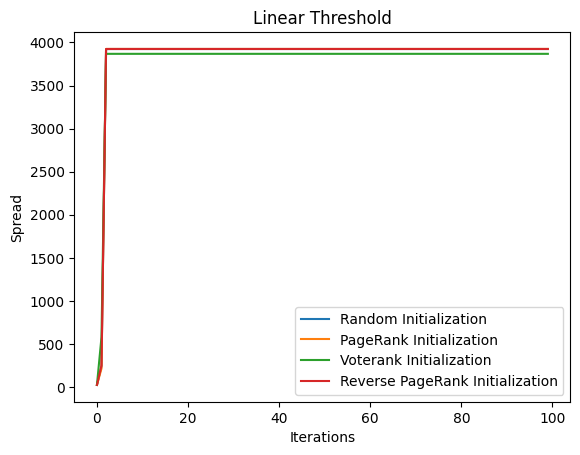

In [18]:
import matplotlib.pyplot as plt
x =len(spread_1)
x = np.arange(x)
plt.plot(x,spread_1,label="Random Initialization")
plt.plot(x,spread_2,label="PageRank Initialization")
plt.plot(x,spread_3,label="Voterank Initialization")
plt.plot(x,spread_4,label="Reverse PageRank Initialization")
plt.xlabel("Iterations")
plt.ylabel("Spread")
plt.title("Linear Threshold")
plt.legend()
plt.show()


In [22]:
from ndlib.models.epidemics import IndependentCascadesModel

def independent_cascade(graph, threshold, seed_set):
    """
    The model performing independent cascade simulation
    """
    # Model selection
    model = IndependentCascadesModel(graph)
    
    # Model configuration
    config = mc.Configuration()
    ## Set edge parameters
    for edge in graph.edges():
        config.add_edge_configuration("threshold", edge, threshold)        
    ## Set the initial infected nodes
    config.add_model_initial_configuration("Infected", seed_set)
    
    # Set the all configuations
    model.set_initial_status(config)
    return model
    

# Number of steps/iterations
ic_num_steps = 50
# Number of nodes in the seed set
ic_seed_set_size = 25
# Determine the seed set
# Determine the model parameter
ic_threshold = 0.5


# Run the model
ic_model_1 = independent_cascade(graph=g, threshold=ic_threshold, seed_set=list(intersection_rand)[:25])
ic_iterations = ic_model_1.iteration_bunch(ic_num_steps)
spread_1 = []
for iteration in ic_iterations:
    spread_1.append(iteration['node_count'][1])
print("Final Spread, Rand PBR, susceptible, infected and the recovered nodes ",ic_iterations[-1]["node_count"])

ic_model_2 = independent_cascade(graph=g, threshold=ic_threshold, seed_set=list(intersection_pr)[:25])
ic_iterations = ic_model_2.iteration_bunch(ic_num_steps)
spread_2 = []
for iteration in ic_iterations:
    spread_2.append(iteration['node_count'][1])
print("Final Spread, PR PBR, susceptible, infected and the recovered nodes ",ic_iterations[-1]["node_count"])

ic_model_3 = independent_cascade(graph=g, threshold=ic_threshold, seed_set=list(vr_set)[:25])
ic_iterations = ic_model_3.iteration_bunch(ic_num_steps)
spread_3 = []
for iteration in ic_iterations:
    spread_3.append(iteration['node_count'][1])
print("Final Spread, VR, susceptible, infected and the recovered nodes ",ic_iterations[-1]["node_count"])


ic_model_4 = independent_cascade(graph=g, threshold=ic_threshold, seed_set=list(top_values_set)[:25])
ic_iterations = ic_model_4.iteration_bunch(ic_num_steps)
spread_4 = []
for iteration in ic_iterations:
    spread_4.append(iteration['node_count'][1])
print("Final Spread, RPR, susceptible, infected and the recovered nodes ",ic_iterations[-1]["node_count"])

Final Spread, Rand PBR, susceptible, infected and the recovered nodes  {0: 76, 1: 0, 2: 3924}
Final Spread, PR PBR, susceptible, infected and the recovered nodes  {0: 75, 1: 0, 2: 3925}
Final Spread, VR, susceptible, infected and the recovered nodes  {0: 100, 1: 0, 2: 3900}
Final Spread, RPR, susceptible, infected and the recovered nodes  {0: 76, 1: 0, 2: 3924}


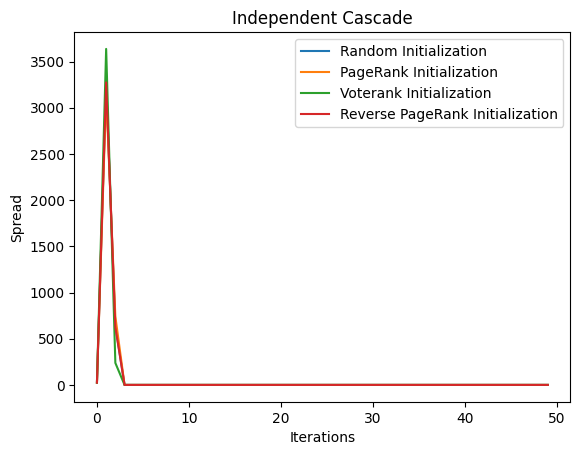

In [23]:
x = np.arange(len(spread_1))
plt.plot(x,spread_1,label="Random Initialization")
plt.plot(x,spread_2,label="PageRank Initialization")
plt.plot(x,spread_3,label="Voterank Initialization")
plt.plot(x,spread_4,label="Reverse PageRank Initialization")
plt.xlabel("Iterations")
plt.ylabel("Spread")
plt.title("Independent Cascade")
plt.legend()
plt.show()
